# Designing a model that predicts customer's credit worthiness

- The model decides if a credit should be issued out

# Steps:
-  Step 1: Data Prep and Analysis:: we will perform some data anaylsis
-  Step 2: Feature engineering and feature selection:: we build some feature models using feature engineering
-  Step 3: Feature engineering pipeline:: we will creeate a feature engineering  pipeline
-  Step 4: Machine learning pipeline:: build and setup our ML model pipeline


In [1]:
import pandas as pd


In [2]:
# load the dataset
data = pd.read_csv('CreditScoring.csv')

# read snapshot of the dataset
data.head()


,Status,Seniority,Home,Time,Age,Marital,Records,Job,Expenses,Income,Assets,Debt,Amount,Price
0,1,9,1,60,30,2,1,3,73,129,0,0,800,846
1,1,17,1,60,58,3,1,1,48,131,0,0,1000,1658
2,2,10,2,36,46,2,2,3,90,200,3000,0,2000,2985
3,1,0,1,60,24,1,1,1,63,182,2500,0,900,1325
4,1,0,1,36,26,1,1,1,46,107,0,0,310,910


In [3]:
# return the shape of the dataset
print(data.shape)
data.dtypes

(4455, 14)


Status       int64
Seniority    int64
Home         int64
Time         int64
Age          int64
Marital      int64
Records      int64
Job          int64
Expenses     int64
Income       int64
Assets       int64
Debt         int64
Amount       int64
Price        int64
dtype: object

In [4]:
# format the feature headers
data.columns = data.columns.str.lower()

In [5]:
# update the categorical var with its string values so we can know what each number represent
status_values = {1: "good", 2: "bad", 0: "unknown"}
data.status = data.status.map(status_values)

home_values = {1: "rent", 2: "owner", 3: "priv", 4: "ignore", 5: "parents",6: "other", 0: "unknown"}
data.home = data.home.map(home_values)

marital_values = {1:"single", 2:"married", 3:"widow", 4:"separated", 5:"divorced", 0:"unknown"}
data.marital = data.marital.map(marital_values)

records_values = {1:"no_rec", 2:"yes_rec"}
data.records = data.records.map(records_values)

job_values = {1:"fixed", 2:"partime", 3:"freelance", 4:"others", 0: 'unknown"'}
data.job = data.job.map(job_values)


In [6]:
data.head()

,status,seniority,home,time,age,marital,records,job,expenses,income,assets,debt,amount,price
0,good,9,rent,60,30,married,no_rec,freelance,73,129,0,0,800,846
1,good,17,rent,60,58,widow,no_rec,fixed,48,131,0,0,1000,1658
2,bad,10,owner,36,46,married,yes_rec,freelance,90,200,3000,0,2000,2985
3,good,0,rent,60,24,single,no_rec,fixed,63,182,2500,0,900,1325
4,good,0,rent,36,26,single,no_rec,fixed,46,107,0,0,310,910


In [7]:
data.describe().round()

,seniority,time,age,expenses,income,assets,debt,amount,price
count,4455.0,4455.0,4455.0,4455.0,4455.0,4455.0,4455.0,4455.0,4455.0
mean,8.0,46.0,37.0,56.0,763317.0,1060341.0,404382.0,1039.0,1463.0
std,8.0,15.0,11.0,20.0,8703625.0,10217569.0,6344253.0,475.0,628.0
min,0.0,6.0,18.0,35.0,0.0,0.0,0.0,100.0,105.0
25%,2.0,36.0,28.0,35.0,80.0,0.0,0.0,700.0,1118.0
50%,5.0,48.0,36.0,51.0,120.0,3500.0,0.0,1000.0,1400.0
75%,12.0,60.0,45.0,72.0,166.0,6000.0,0.0,1300.0,1692.0
max,48.0,72.0,68.0,180.0,99999999.0,99999999.0,99999999.0,5000.0,11140.0


In [8]:
# we are told that 99999999 represents data not available for a particular user. Hence, let's
#replace them with the usual NaN in numoy

import numpy as np

num_List = ['income', 'assets', 'debt']
for var in num_List:
    data[var].replace(to_replace=99999999, value=np.nan, inplace=True)

In [9]:
data  = data[data.status != 'unknown']

In [10]:
data.status.unique()

array(['good', 'bad'], dtype=object)

In [11]:
data.status = (data.status == 'good').astype(int)
data.status.unique()

array([1, 0])

In [12]:
data.head()

,status,seniority,home,time,age,marital,records,job,expenses,income,assets,debt,amount,price
0,1,9,rent,60,30,married,no_rec,freelance,73,129.0,0.0,0.0,800,846
1,1,17,rent,60,58,widow,no_rec,fixed,48,131.0,0.0,0.0,1000,1658
2,0,10,owner,36,46,married,yes_rec,freelance,90,200.0,3000.0,0.0,2000,2985
3,1,0,rent,60,24,single,no_rec,fixed,63,182.0,2500.0,0.0,900,1325
4,1,0,rent,36,26,single,no_rec,fixed,46,107.0,0.0,0.0,310,910


# Credit worthiness by Group

- we compare group credit worthiness performance with Global credit worthiness
- x = XG - Xg; where XG is our Global credit worthiness and Xg is group credit worthiness
- if x > 0; less likely to be credit worthy
- if x < 0; more likely to be credit worthy

# Credit risk by Group

- Credit risk ratio = group credit worthiness score/ Global credit worthiness
- if credit risk ratio > 1; more likely to be credit worthy
- if credit risk ratio < 1; less likely to be credit worthy

In [13]:
from IPython.display import display
# create respective cohorts to understufy


#firstly, we calculate the global credit worthiness

global_credit_worthiness = data.status.mean().round(2)
print(global_credit_worthiness)


# make a list of cohorts
cohorts = ['home','marital','job']

for var in cohorts:
    print(var)
    data_group = data.groupby(var)['status'].agg(['mean', 'count']).sort_values(by='mean', ascending=False)

    # compute the difference from each group with respect to the global credit worthiness differences.

    data_group['diff'] = global_credit_worthiness - data_group['mean']

    # compute the credit_risk ratio to get each group's risk
    data_group['credit_risk'] = data_group['mean']/global_credit_worthiness

    data_group = data_group.rename(columns={"mean": "group_creditworthiness"})

    display(data_group)



0.72
home


,group_creditworthiness,count,diff,credit_risk
home,,,,
owner,0.814903,2107,-0.094903,1.131809
parents,0.702427,783,0.017573,0.975592
priv,0.658537,246,0.061463,0.914634
rent,0.601233,973,0.118767,0.835046
ignore,0.550000,20,0.170000,0.763889
other,0.542320,319,0.177680,0.753222
unknown,0.333333,6,0.386667,0.462963


marital


,group_creditworthiness,count,diff,credit_risk
marital,,,,
unknown,1.000000,1,-0.280000,1.388889
married,0.744215,3241,-0.024215,1.033632
widow,0.716418,67,0.003582,0.995025
single,0.664278,977,0.055722,0.922609
divorced,0.631579,38,0.088421,0.877193
separated,0.507692,130,0.212308,0.705128


job


,group_creditworthiness,count,diff,credit_risk
job,,,,
fixed,0.793226,2805,-0.073226,1.101703
freelance,0.674805,1024,0.045195,0.937229
others,0.602339,171,0.117661,0.836582
partime,0.400442,452,0.319558,0.556170
"unknown""",0.000000,2,0.720000,0.000000


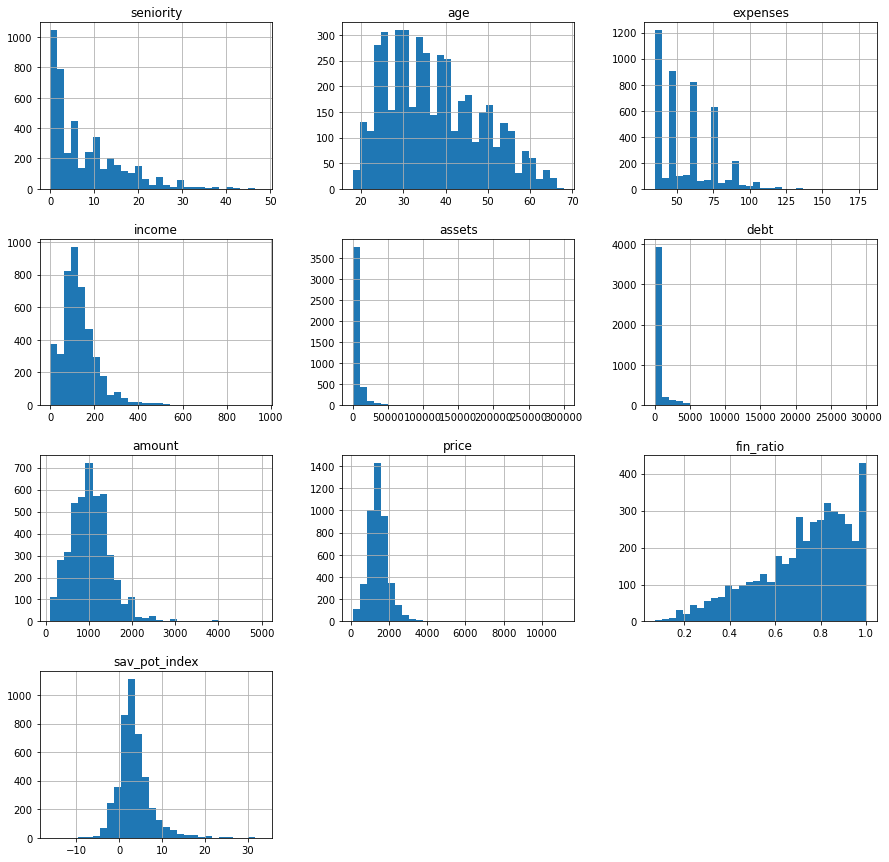

In [30]:
# let's examine the distibution of our numerical variable
import matplotlib.pyplot as plt
#firstly we obtain the numerical variables

num_var = [var for var in data.columns if data[var].dtype != 'object' and var != 'status']

continuous_num_var = [var for var in num_var if data[var].nunique()>20]

data[continuous_num_var].hist(bins=30, figsize=(15,15))

plt.show()

The above result shows that Seniority, price, fin_ratio, assets, debts and amount are highly skewed, hence we will apply some transformation

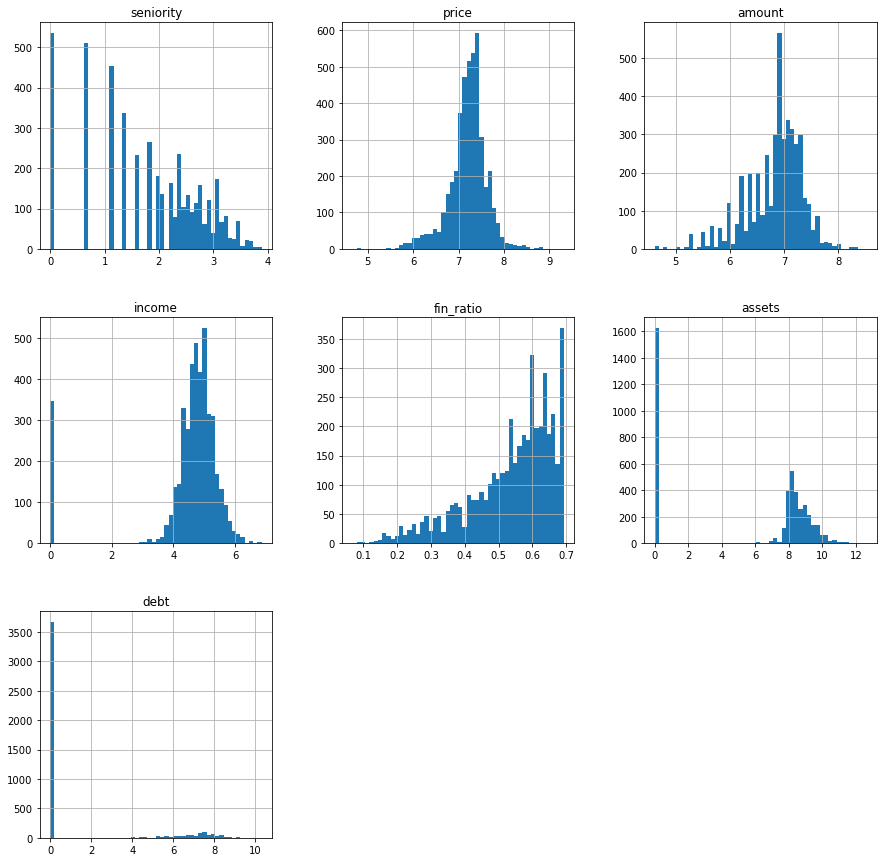

In [32]:
log_vars = ['price', 'amount', 'income', 'assets', 'debt']
tmp = data.copy()
for var in log_vars:
    tmp[var] = np.log1p(tmp[var])


tmp[log_vars].hist(bins=50, figsize=(15,15))
plt.show()

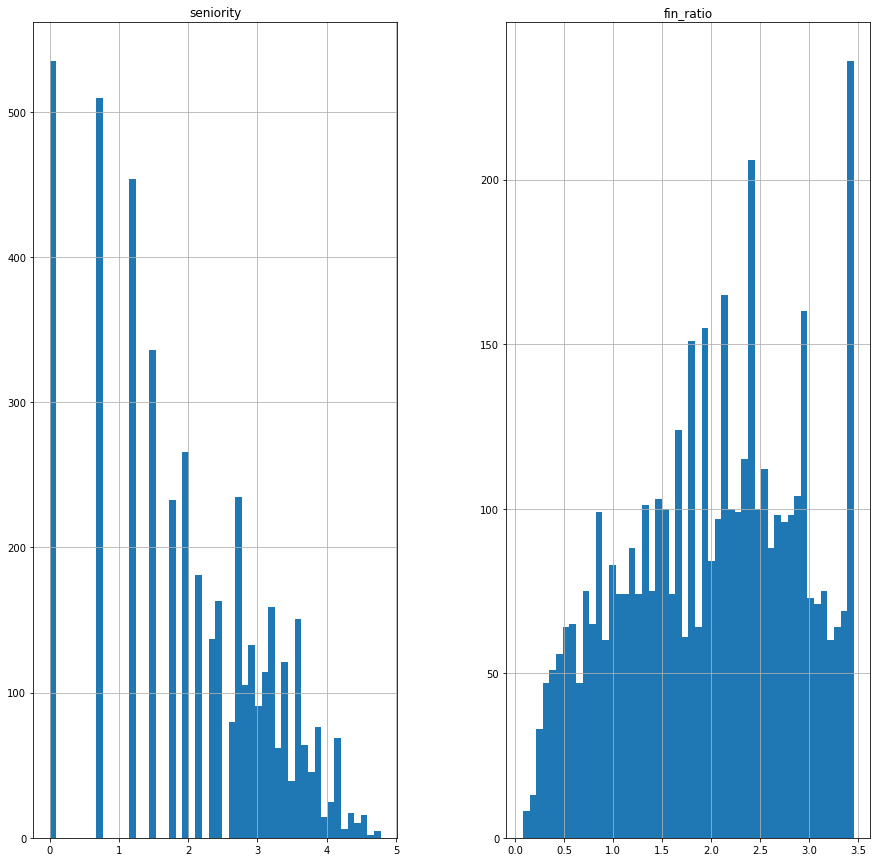

In [34]:
# from the above fin ratio and senority aren't affected much by the log transformer

import scipy.stats as stats
# so we try the yeo-johnson transformer
yeo_vars = ['seniority', 'fin_ratio']

tmp = data.copy()

for var in yeo_vars:
    tmp[var], param = stats.yeojohnson(tmp[var])


tmp[yeo_vars].hist(bins=50, figsize=(15,15))
plt.show()

# Let's compute the finance ratio and savings potential index for each account

In [22]:
# finance ratio  = amount/price

# savings potential index = (Income - Expenses - (Debt/100)) / (Amount / Time)


data['fin_ratio'] = (data['amount']/data['price']).round(2)

data['sav_pot_index'] = ((data['income'] - data['expenses'] - (data['debt']/100))/ (data['amount']/data['time'])).round(2)

data.head()


,status,seniority,home,time,age,marital,records,job,expenses,income,assets,debt,amount,price,fin_ratio,sav_pot_index
0,1,9,rent,60,30,married,no_rec,freelance,73,129.0,0.0,0.0,800,846,0.95,4.20
1,1,17,rent,60,58,widow,no_rec,fixed,48,131.0,0.0,0.0,1000,1658,0.60,4.98
2,0,10,owner,36,46,married,yes_rec,freelance,90,200.0,3000.0,0.0,2000,2985,0.67,1.98
3,1,0,rent,60,24,single,no_rec,fixed,63,182.0,2500.0,0.0,900,1325,0.68,7.93
4,1,0,rent,36,26,single,no_rec,fixed,46,107.0,0.0,0.0,310,910,0.34,7.08


# Separating the datasets into Categorical and Numerical Variables

In [23]:
cat_var  = [var for var in data.columns if data[var].dtype == 'object']
num_var = [var for var in data.columns if var not in cat_var and var != 'status']
target = 'status'

print(cat_var, num_var, target)

['home', 'marital', 'records', 'job'] ['seniority', 'time', 'age', 'expenses', 'income', 'assets', 'debt', 'amount', 'price', 'fin_ratio', 'sav_pot_index'] status


In [24]:
#Check for missing values in each variable type
data[cat_var].isnull().mean()

home       0.0
marital    0.0
records    0.0
job        0.0
dtype: float64

In [25]:
data[num_var].isnull().mean().sort_values(ascending=False)

sav_pot_index    0.011001
assets           0.010552
income           0.007634
debt             0.004041
seniority        0.000000
time             0.000000
age              0.000000
expenses         0.000000
amount           0.000000
price            0.000000
fin_ratio        0.000000
dtype: float64

In [26]:
# Uncovering the cardinality in our categorical variable
data[cat_var].nunique()

home       7
marital    6
records    2
job        5
dtype: int64

The above shows that we do not need to worry about cardinality problems

In [27]:
# retrieve the variables with missing data
num_var_na = [var for var in num_var if data[var].isnull().sum() > 0]
num_var_na

['income', 'assets', 'debt', 'sav_pot_index']